In [8]:
import numpy as np
import sys
import collections
import cv2
import os
import math
import random
import pickle
import copy
import matplotlib.pyplot as plt
sys.path.append("C:GitHub\\MeronymNet-PyTorch\\src")

In [9]:
def get_boundary(bboxes):
    labels = np.where(bboxes[:, :1]==1)[0]
    x_min = np.min(bboxes[labels,1])
    y_min = np.min(bboxes[labels,2])
    x_max = np.max(bboxes[labels,3])
    y_max = np.max(bboxes[labels,4])
    
    return np.matrix([[x_min, y_min, x_max, y_max]])
    
def get_all_boundaries(X_train):
    data_len, _, _ = X_train.shape
    res = []
    for i in range(data_len):
        res.append(get_boundary(X_train[i]) )
    X_train_new_limits = np.concatenate(res, axis=0)
    return X_train_new_limits

def get_new_coordinates(X_train, X_train_obj):
    
    data_len, _, _ = X_train.shape
    X_train_scaled = X_train.copy()
    for i in range(data_len):
        min_x, min_y, max_x, max_y = X_train_obj[i].tolist()[0]
        labels = np.where(X_train[i, :, :1]==1)[0]
        
        # Scaling X
        X_train_scaled[i][labels,1] = (X_train_scaled[i][labels,1] - min_x) / (max_x - min_x)
        X_train_scaled[i][labels,3] = (X_train_scaled[i][labels,3] - min_x) / (max_x - min_x)
        #Scaling Y
        X_train_scaled[i][labels,2] = (X_train_scaled[i][labels,2] - min_y) / (max_y - min_y)
        X_train_scaled[i][labels,4] = (X_train_scaled[i][labels,4] - min_y) / (max_y - min_y)
        
    return X_train_scaled


def get_new_coordinates(X_train, X_train_obj):
    
    data_len, _, _ = X_train.shape
    X_train_scaled = X_train.copy()
    for i in range(data_len):
        min_x, min_y, max_x, max_y = X_train_obj[i].tolist()[0]
        labels = np.where(X_train[i, :, :1]==1)[0]
        
        # Scaling X
        X_train_scaled[i][labels,1] = (X_train_scaled[i][labels,1] - min_x) / (max_x - min_x)
        X_train_scaled[i][labels,3] = (X_train_scaled[i][labels,3] - min_x) / (max_x - min_x)
        #Scaling Y
        X_train_scaled[i][labels,2] = (X_train_scaled[i][labels,2] - min_y) / (max_y - min_y)
        X_train_scaled[i][labels,4] = (X_train_scaled[i][labels,4] - min_y) / (max_y - min_y)
        
    return X_train_scaled

def get_new_coordinates(X_train, X_train_obj):
    
    data_len, _, _ = X_train.shape
    X_train_scaled = X_train.copy()
    for i in range(data_len):
        min_x, min_y, max_x, max_y = X_train_obj[i].tolist()[0]
        min_x = min_y = min(min_x, min_y)
        max_x = max_y = max(max_x, max_y)
        labels = np.where(X_train[i, :, :1]==1)[0]
        
        # Scaling X
        X_train_scaled[i][labels,1] = (X_train_scaled[i][labels,1] - min_x) / (max_x - min_x)
        X_train_scaled[i][labels,3] = (X_train_scaled[i][labels,3] - min_x) / (max_x - min_x)
        #Scaling Y
        X_train_scaled[i][labels,2] = (X_train_scaled[i][labels,2] - min_y) / (max_y - min_y)
        X_train_scaled[i][labels,4] = (X_train_scaled[i][labels,4] - min_y) / (max_y - min_y)
        
    return X_train_scaled


In [10]:
%cd ..
%cd ..
%cd ..

C:\
C:\
C:\


In [11]:
file_suffix = ['X_test', 'X_train', 'X_train_val']
for file in file_suffix:
    
    infile = 'C:/GitHub/meronymnet/data_np_16/'+file+'_combined_mask_data.np'
    with open(infile, 'rb') as pickle_file:
        temp = pickle.load(pickle_file)
    
    temp_boundaries = get_all_boundaries(temp)
    print(temp_boundaries.shape)
    
    outfile = 'C:/GitHub/meronymnet/data_np_16/'+file+'_obj_boundary_sqr.np'
    with open(outfile, 'wb') as pickle_file:
        pickle.dump(temp_boundaries,pickle_file)
        
    temp_scaled = get_new_coordinates(temp, temp_boundaries)
    outfile = 'C:/GitHub/meronymnet/data_np_16/'+file+'_scaled_sqr.np'
    with open(outfile, 'wb') as pickle_file:
        pickle.dump(temp_scaled,pickle_file)
    print(temp_scaled.shape)


(692, 4)
(692, 16, 5)
(3394, 4)
(3394, 16, 5)
(448, 4)
(448, 16, 5)


In [12]:
def plot_all_boxes(images, scaled_images):
    plots = 2*len(images)
    figure = plt.figure(figsize=(20, 10))
    i=1
    for img, scl_img in zip(images, scaled_images):
        plt.subplot(int(np.ceil(plots/4)), 4, i)
        plt.xlim(0, 660)
        plt.ylim(0, 660)
        for box in img:
            
            _, x_min, y_min, x_max, y_max = box
            plt.plot([x_min, x_max, x_max, x_min, x_min],
                     [y_min, y_min, y_max, y_max, y_min]
                    )
        i+=1
        plt.subplot(int(np.ceil(plots/4)), 4, i)
        plt.xlim(0, 660)
        plt.ylim(0, 660)
        for box in scl_img:
            _, x_min, y_min, x_max, y_max = box
            plt.plot([x_min, x_max, x_max, x_min, x_min],
                     [y_min, y_min, y_max, y_max, y_min]
                    )
        i+=1
    plt.show()
             

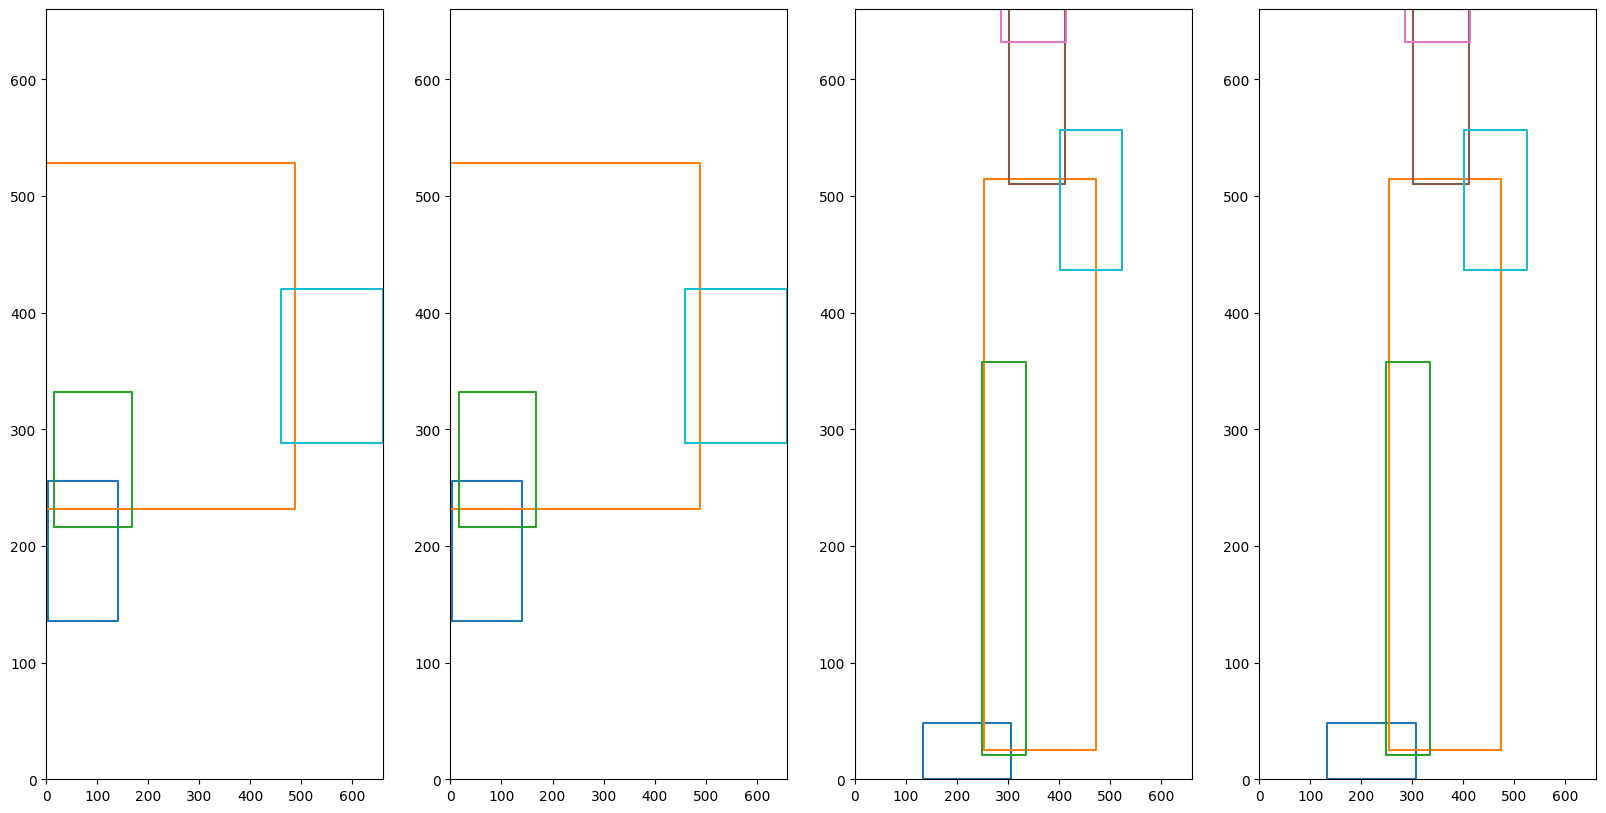

In [7]:
plot_all_boxes(temp[0:2]*660, temp_scaled[0:2]*660)